## Observations and Insights 

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
# Combine the data into a single dataset use"Mouse Id" as merge point
alldata=pd.merge(mouse_metadata, study_results, on="Mouse ID")
alldata.head()

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [108]:
# Checking the number of mice.
#mice_count=len(alldata['Mouse ID'].unique())
#print(f'mice_count {mice_count}')
#row_count=len(alldata['Mouse ID'])
#print(f'row_count {row_count}')

In [109]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates_df=alldata.groupby(['Mouse ID','Timepoint'])
#duplicates_df
#duplicates_df.duplicated(subset((['Mouse ID','Timepoint']))
                         
duplicates=alldata.duplicated(subset=(['Mouse ID','Timepoint']))
#duplicates.loc[True]
duplicate_mouse=alldata.loc[duplicates, 'Mouse ID'].unique()
duplicate_mouse
#df.loc[somearray,columns]

array(['g989'], dtype=object)

In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=alldata.drop(alldata[alldata['Mouse ID']=='g989'].index)


In [111]:
# Checking the number of mice and rows in the clean DataFrame.
row_count_clean=len(clean_data['Mouse ID'])
print(f'clean row_count {row_count_clean}')

clean_mice_count=len(clean_data['Mouse ID'].unique())
print(f'clean mice_count {clean_mice_count}')

clean row_count 1880
clean mice_count 248


## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimengrp=clean_data.groupby(['Drug Regimen'])
regimen_mean=regimengrp['Tumor Volume (mm3)'].mean()
regimen_median=regimengrp['Tumor Volume (mm3)'].median()
regimen_variance=regimengrp['Tumor Volume (mm3)'].var()
regimen_std=regimengrp['Tumor Volume (mm3)'].std()
regimen_SEM=regimengrp['Tumor Volume (mm3)'].sem()


In [113]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugstats={
    "Drug Mean": regimen_mean,
    "Drug Mmedian": regimen_median,
    "Drug Variance": regimen_variance,
    "Drug Standard Deviation": regimen_std,
    "Drug SEM": regimen_SEM
    
    }
drugregsummary=pd.DataFrame(drugstats)
drugregsummary

,Drug Mean,Drug Mmedian,Drug Variance,Drug Standard Deviation,Drug SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimengrp2=clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
regimengrp2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

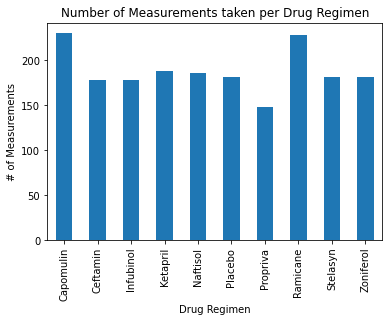

In [115]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#The X axis will be the names of the drug Regimen and the y axis will be the # of measurements.
#clean_data.head()

total_measurements=clean_data.groupby(['Drug Regimen']).count()["Timepoint"]
measurements_chart=total_measurements.plot(kind='bar')
#measurements_chart.set_ylabel('# of Measurements')
plt.ylabel('# of Measurements')
plt.xlabel('Drug Regimen')
plt.title('Number of Measurements taken per Drug Regimen')
plt.show()


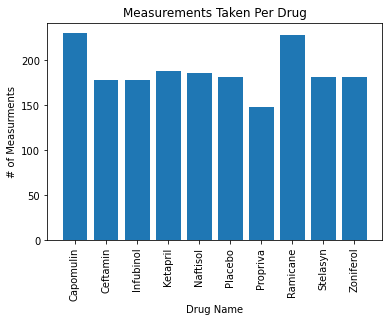

In [116]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.plot
x_axis=total_measurements.keys()
plt.bar(x_axis, total_measurements)
plt.title('Measurements Taken Per Drug')
plt.xlabel ('Drug Name')
plt.ylabel('# of Measurments')
plt.xticks(rotation=90)
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, :)
plt.show()



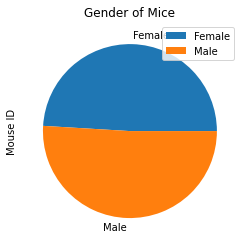

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#The x-axis will be Sex and the Y axis will be the Total of each

count_bygender_df=clean_data.loc[:, ['Mouse ID', 'Sex']].groupby('Sex').count()
count_bygender_df.plot(y='Mouse ID', x='Sex', kind='pie')
plt.title('Gender of Mice')
plt.show()

#gender_count=len(gender_grp)['Mouse ID'].unique()
#gender_count



In [118]:
count_bygender_df

,Mouse ID
Sex,
Female,922
Male,958


<ipython-input-119-9a398ef31b5c>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(count_bygender_df, labels=count_bygender_df.index)


Text(0.5, 1.0, 'Measurements Taken Per Drug')

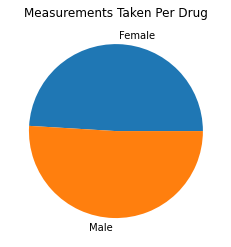

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=total_measurements.keys()
plt.pie(count_bygender_df, labels=count_bygender_df.index)
plt.title('Measurements Taken Per Drug')


## Quartiles, Outliers and Boxplots

In [120]:
#Kevin did this code in class as an example
#max_timepoint=clean_data.groupby('Mouse ID')['Timepoint'].max()
#pd.merge(max_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
fourdrugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fourdrug_df=clean_data[clean_data['Drug Regimen'].isin(fourdrugs)]
fourdrug_df
# Start by getting the last (greatest) timepoint for each mouse

#use max timepoint for  MouseId
max_timepoint=fourdrug_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
fourdrug_max=pd.merge(max_timepoint, clean_data, on=('Mouse ID','Timepoint'))
fourdrug_max



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [122]:
                        

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
for each_drug in fourdrugs:

    tumor=fourdrug_max.loc[fourdrug_max['Drug Regimen']==each_drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor)   # add subset 
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_volume= tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(outlier_volume)

    
tumor_vol_list  
   
   



Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

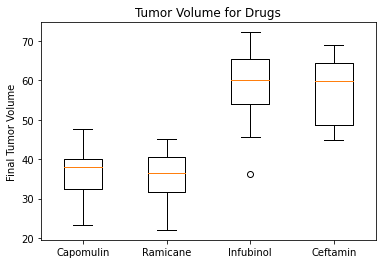

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drugs')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_vol_list, labels=fourdrugs)
plt.show()



## Line and Scatter Plots

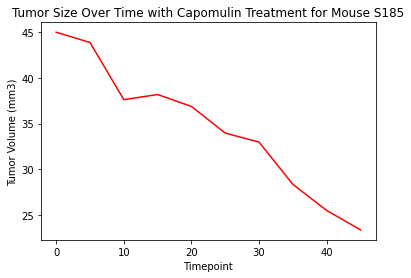

In [124]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin=['Capomulin']

capomulin_df=clean_data[clean_data['Drug Regimen'].isin(capomulin)]
capomulin_df

capomulin_mouse=capomulin_df[capomulin_df['Mouse ID']=='s185']

capomulin_mouse

x_axis_data=capomulin_mouse['Timepoint']
y_axis_data=capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_axis_data, y_axis_data, color="red")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Size Over Time with Capomulin Treatment for Mouse S185")

plt.show()
                                     #max_timepoint=fourdrug_df.groupby('Mouse ID')['Timepoint'].max()

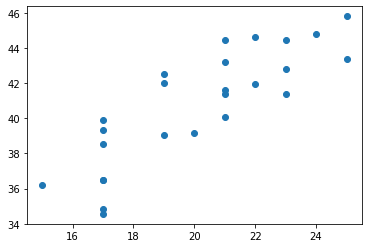

In [125]:
# Generate a scatter plot of average tumor volume vs. avg mouse weight for the Capomulin regimen per mouse
#1/16/2021 44:00 example


#capomulin_df is defined aboved - a dataframe with only mice treated with Capomulin

capomulin_df
capomulin_grp=capomulin_df.groupby(['Mouse ID'])
tumor_vol_avg=capomulin_grp['Tumor Volume (mm3)'].mean()
weight_avg=capomulin_grp['Weight (g)'].mean()

plt.scatter(x=weight_avg, y=tumor_vol_avg)

plt.show()

## Correlation and Regression

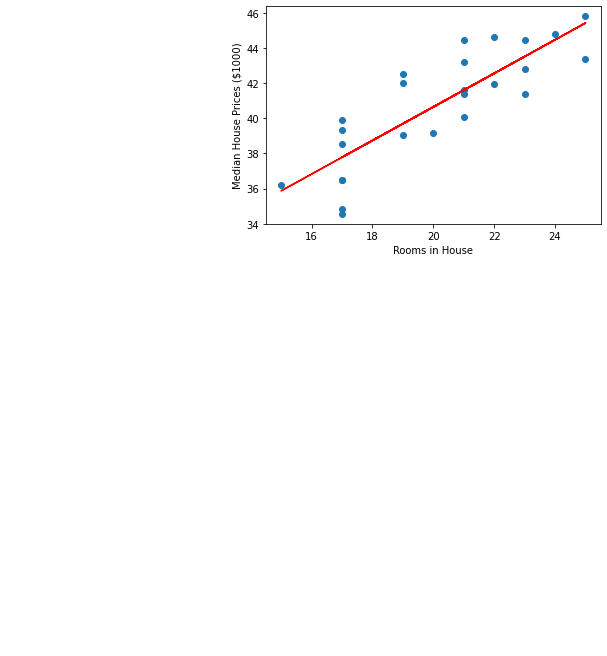

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight_avg
y_values = tumor_vol_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()




In [127]:


#code from class activity

# Calculate the correlation coefficient between alcohol and color_intensity
print(f"The correlation coefficient between alcohol and color intensity is {round(st.pearsonr(alcohol,color_intensity)[0],2)}")



#wine_corr = wine_data.corr()
#wine_corr.unstack().sort_values()